### Image Detection Project

*** 

### Welcome to my personal project in which I will build an Image Recognition Machine Learning model using Support Vector Machines and the MNIST Handwritten Digits data set sourced from scikit-learn.

### Information about the MNIST Handwritten Digits data set:

- Description: The load_digits dataset consists of 8x8 pixel images of handwritten digits. Each image represents a digit from 0 to 9.
- Number of Samples: 1,797
- Number of Features: 64 (each feature represents a pixel value in an 8x8 image)
- Number of Classes: 10 (digits 0 through 9)
- Feature Values: Each pixel value is an integer in the range 0 to 16, where 0 represents white (no ink) and 16 represents black (maximum ink).

### The goal of my project is to demonstrate the power of Machine Learning models in a real-life scenario, showcasing the effectiveness and potential of Machine Learning to drive business success.


***

### Importing libraries and data

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets, svm, metrics
from sklearn.model_selection import KFold, cross_val_score

In [2]:
# Load the digits dataset
digits = datasets.load_digits()

### Visualizing the digits

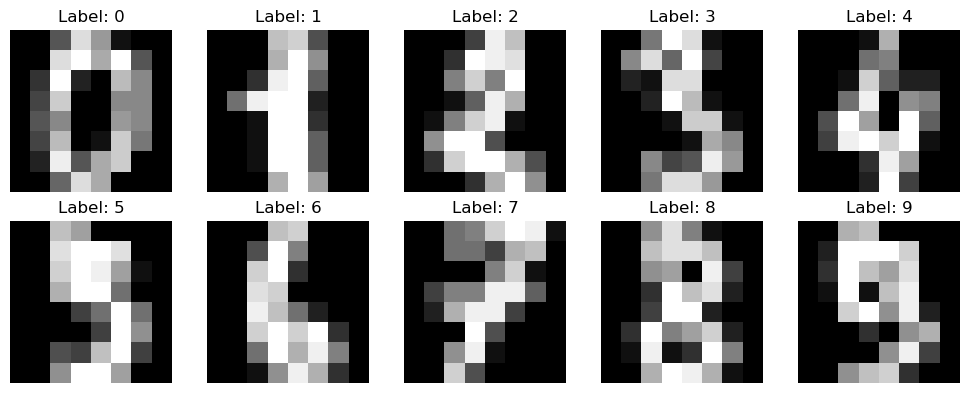

In [3]:
# Extract the images and labels
images = digits.images
labels = digits.target

# Plot the first few images and their labels
plt.figure(figsize=(10, 4))
for index, (image, label) in enumerate(zip(images[:10], labels[:10])):
    plt.subplot(2, 5, index + 1)
    plt.imshow(image, cmap='gray')
    plt.title(f'Label: {label}')
    plt.axis('off')

plt.tight_layout()
plt.show("png")

### Support Vector Machines:

- Support Vector Machines (SVMs) are powerful supervised learning models used for classification and regression tasks. They excel in finding the optimal hyperplane that separates data points into different classes with maximum margin, thereby minimizing generalization error.

- SVMs are effective in high-dimensional spaces and are versatile due to their ability to use different kernel functions for decision boundary flexibility. Key to SVMs is the selection of support vectors, which are data points closest to the hyperplane and crucial in defining its position.

- This approach not only enhances classification accuracy but also ensures robustness against overfitting, making SVMs a popular choice in various machine learning applications.

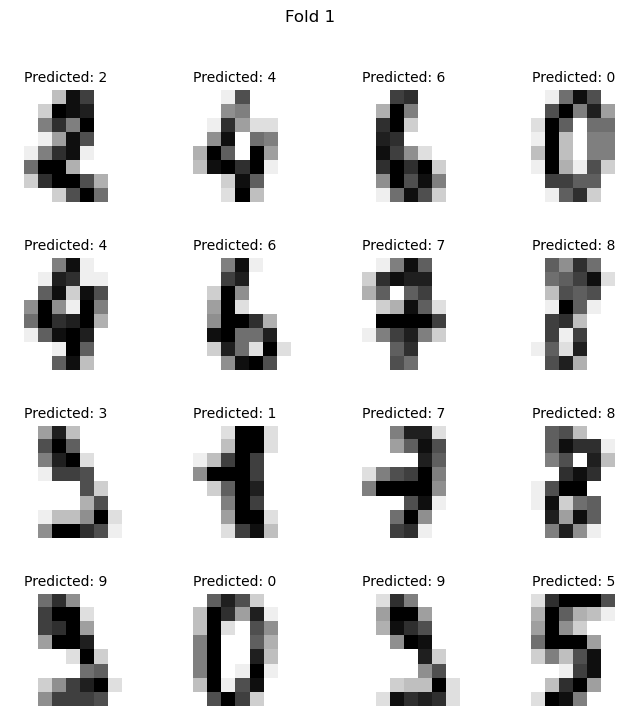

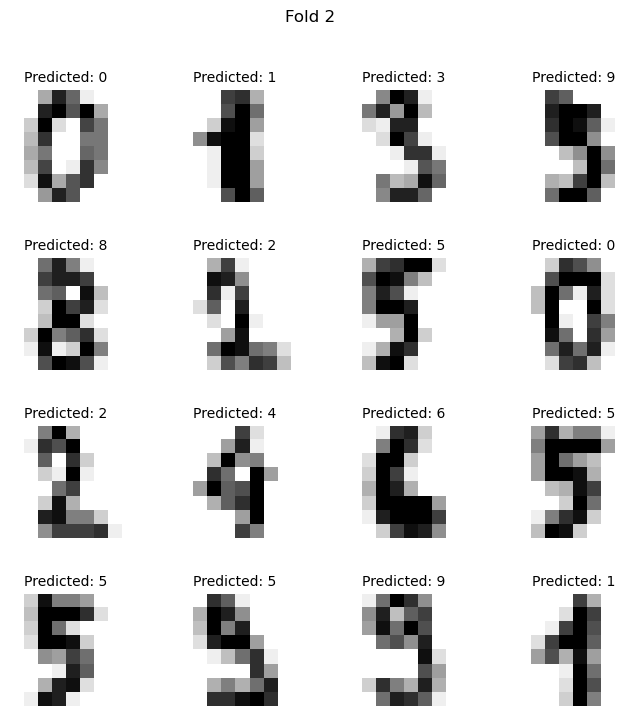

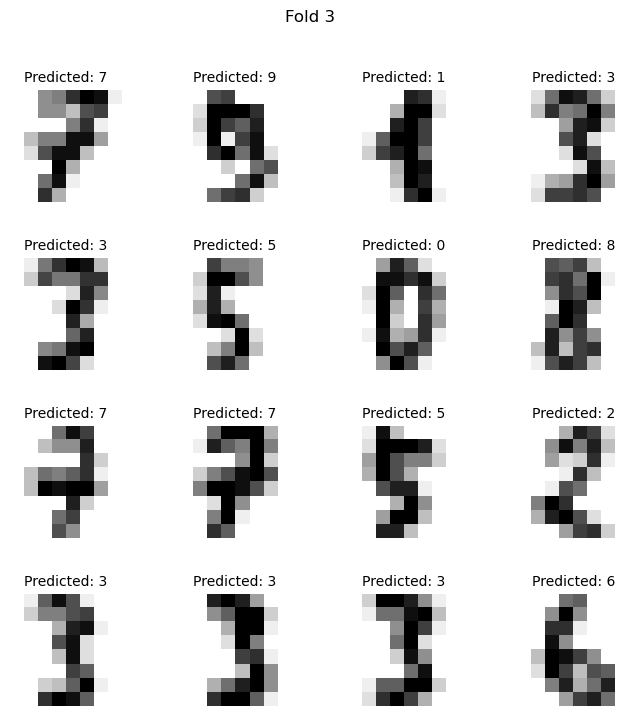

Average Metrics Across All Folds:
Accuracy: 0.98
Precision: 0.98
Recall: 0.98
F1 Score: 0.98


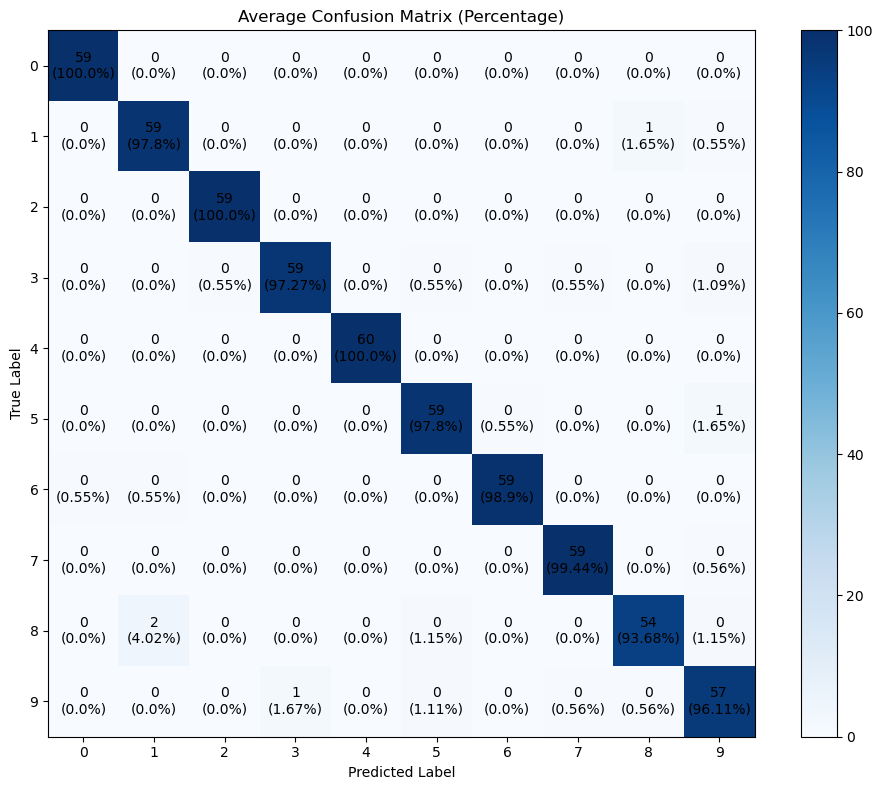

In [4]:
# Create an SVM classifier
clf = svm.SVC(kernel='linear')

# Initialize K-fold cross-validation
kf = KFold(n_splits=3, shuffle=True)

# Initialize variables to accumulate metrics across folds
accuracy = []
precision = []
recall = []
f1 = []
confusion_matrices = []

# Perform K-fold cross-validation
for fold, (train_index, test_index) in enumerate(kf.split(digits.data)):
    X_train, X_test = digits.data[train_index], digits.data[test_index]
    y_train, y_test = digits.target[train_index], digits.target[test_index]

    # Train the classifier on the training data
    clf.fit(X_train, y_train)

    # Predict the labels of the test set
    predicted = clf.predict(X_test)

    # Calculate metrics
    accuracy.append(metrics.accuracy_score(y_test, predicted))
    precision.append(metrics.precision_score(y_test, predicted, average='weighted'))
    recall.append(metrics.recall_score(y_test, predicted, average='weighted'))
    f1.append(metrics.f1_score(y_test, predicted, average='weighted'))
    confusion_matrices.append(metrics.confusion_matrix(y_test, predicted))

    # Plot some of the digits with their predicted labels
    fig, axes = plt.subplots(4, 4, figsize=(8, 8))
    fig.suptitle(f'Fold {fold + 1}')
    fig.subplots_adjust(hspace=0.5, wspace=0.5)
    for i, ax in enumerate(axes.flat):
        ax.imshow(X_test[i].reshape(8, 8), cmap='binary')
        ax.set_title(f'Predicted: {predicted[i]}', fontsize=10)
        ax.axis('off')

    plt.show("png")

# Print aggregated metrics across all folds
print("Average Metrics Across All Folds:")
print(f"Accuracy: {np.mean(accuracy):.2f}")
print(f"Precision: {np.mean(precision):.2f}")
print(f"Recall: {np.mean(recall):.2f}")
print(f"F1 Score: {np.mean(f1):.2f}")

# Print aggregated confusion matrix across all folds
average_conf_matrix = np.mean(confusion_matrices, axis=0)
total_samples = np.sum(average_conf_matrix, axis=1, keepdims=True)
percentage_conf_matrix = np.round(100 * average_conf_matrix / total_samples, 2)

plt.figure(figsize=(10, 8))
plt.imshow(percentage_conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Average Confusion Matrix (Percentage)')
plt.colorbar()
tick_marks = np.arange(len(digits.target_names))
plt.xticks(tick_marks, digits.target_names)
plt.yticks(tick_marks, digits.target_names)

for i in range(percentage_conf_matrix.shape[0]):
    for j in range(percentage_conf_matrix.shape[1]):
        plt.text(j, i, f"{int(average_conf_matrix[i, j])}\n({percentage_conf_matrix[i, j]}%)",
                 horizontalalignment="center", verticalalignment="center", color="black")

plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.tight_layout()
plt.show("png")

*** 

### Conclusion:

- This notebook effectively demonstrates the use of a Support Vector Machine (SVM) classifier with linear kernel for digit classification on the MNIST dataset, employing K-Fold Cross Validation to assess model performance.

- Visualizations within the loop offer insights into the model's predictions for sample digits. The aggregated metrics and the average confusion matrix presented at the end provide a comprehensive summary of the SVM's classification performance, highlighting its ability to effectively classify handwritten digits across different classes. This approach ensures robust evaluation of the SVM model's generalization capabilities on the MNIST dataset.

- Overall, the SVM with linear kernel proved to be effective for digit classification.